# Exploratory analysis of graduation data from different majors
<font size="4">In this exploratory analysis, I'm going to dig into data about students' earnings after finishing 
their majors and finding underlying trends.</font>

In [1]:
#importing neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#loading in the data
recent_grads = pd.read_csv('recent-grads.csv')

In [3]:
#showing columns
recent_grads.iloc[0:0]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs


<font size="4">The columns in the dataset are described as follows:<br>
    
*__Rank__ - Rank by median earnings (the dataset is ordered by this column).<br>
<br>
    
*__Major_code__ - Major code.<br>
    
*__Major__ - Major description.<br>
    
*__Major_category__ - Category of major.<br>
    
*__Total__ - Total number of people with major.<br>
    
*__Sample_size__ - Sample size (unweighted) of full-time.<br>
    
*__Men__ - Male graduates.<br>
    
*__Women__ - Female graduates.<br>
    
*__ShareWomen__ - Women as share of total.<br>
    
*__Employed__ - Number employed.<br>
    
*__Median__ - Median salary of full-time, year-round workers.<br>
    
*__Low_wage_jobs__ - Number in low-wage service jobs.<br>
    
*__Full_time__ - Number employed 35 hours or more.<br>
    
*__Part_time__ - Number employed less than 35 hours.<br>


</font>

In [5]:
#showing the first few rows of the dataset
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
#showing basic statistics about the data
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [7]:
#retrieving the lenght of the columns
raw_data_count = recent_grads.shape[0]

In [8]:
#dropping null values
recent_grads = recent_grads.dropna()

In [9]:
#retrieving the lenght of the columns without nulls
cleaned_data_count = recent_grads.shape[0]

In [10]:
print(raw_data_count, cleaned_data_count)

173 172


<hr>
<font size="4">Above, I cleaned the data of NaN values
    
Below starts the analysis. First, the relation between the following columns is explored:<br>
    
<br>__1)__ Sample_size - Median<br>
    
__2)__ Sample_size - Unemployment_rate<br>
    
__3)__ Full_time - Median<br>
    
__4)__ ShareWomen - Unemployment_rate<br>
    
__5)__ Men - Median<br>
    
__6)__ Women - Median<br>
</font>

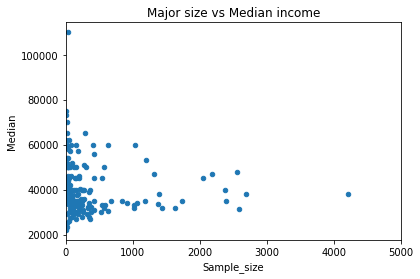

In [11]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', xlim=(0,5000), title='Major size vs Median income')

<font size="4">The plot shows that there is no strong correlation between major size and median income, although the biggest earners are from smaller majors.</font>

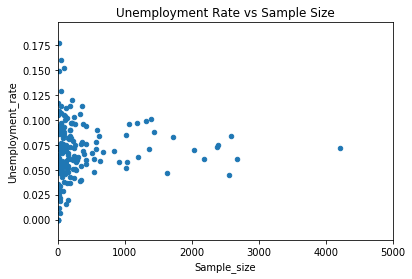

In [12]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', xlim=(0,5000), title='Unemployment Rate vs Sample Size')

<font size="4">There is no correlation between the major size and unemployment rate.</font>

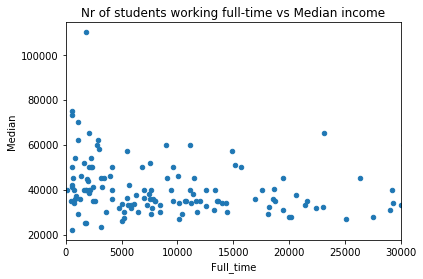

In [15]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Nr of students working full-time vs Median income', xlim=(0,30000))

<font size="4">There is a negative non-linear correlation between those two columns. The median income seems to be dropping while full-time is decreasing, but only until around 10000 students, then it stabilizes.</font>

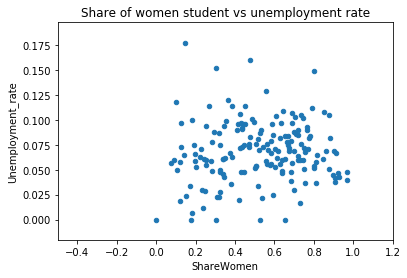

In [16]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='Share of women student vs unemployment rate', xlim=(-0.5,1.2))

<font size="4">There seems to be no correlation between unemployment rate and share of women in different majors.</font>

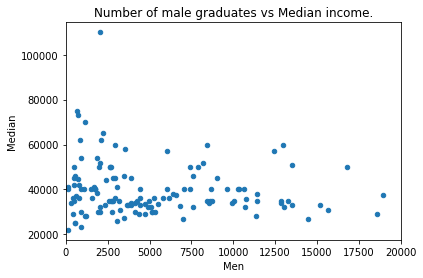

In [17]:
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Number of male graduates vs Median income.', xlim=(0,20000))

<font size="4">There is visible negative non-linear correlation. The median income od dropping as men graduates number increases.</font>

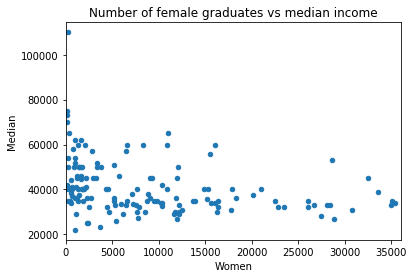

In [18]:
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Number of female graduates vs median income', xlim=(0, 36000))

<font size="4">Here also, seems to be a negative non-linear correlation between women graduated and median income.</font>


<font size="4">To sum up this section, we can come up with following conclusions:<br>
    
1)There is no major link between the popularity of major and earnings of graduates.<br><br>
    
2)There is no correlation between majors with bigger share of women graduates and bigger salaries.<br>
    
3)There seems to be a negative non-linear link between full-time employees and median salary. To simplify - the 
  less full-time employees the higher median salary.</font>
  
<hr>

<font size="4">Now, I'll explore the distributions of the following columns:<br>
    
1)Sample_size<br><br>
    
2)Median<br>
    
3)Employed<br>
    
4)Full_time<br>
    
5)ShareWomen<br>
    
6)Unemployment_rate<br>
    
7)Men<br>
    
8)Women<br></font>

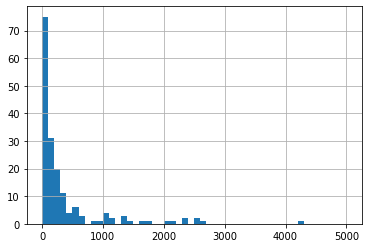

In [19]:
recent_grads['Sample_size'].hist(bins=50, range=(0,5000))

<font size="4">We can see that the most of the distribution is placed in the first fifth of x-axis. The highest number of majors are 100 students or less.</font>

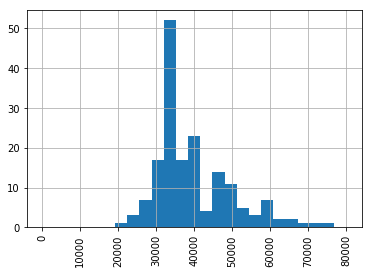

In [18]:
recent_grads['Median'].hist(bins=25, xrot=90, range=(0,80000))

<font size="4">We can see that the biggest number of students make between 30,000 - 50,000 dollars per year.</font>

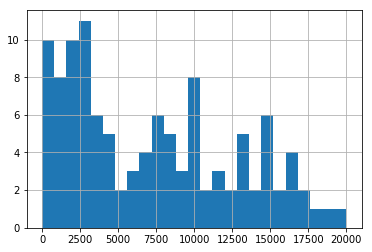

In [19]:
recent_grads['Employed'].hist(bins=25, range=(0,20000))

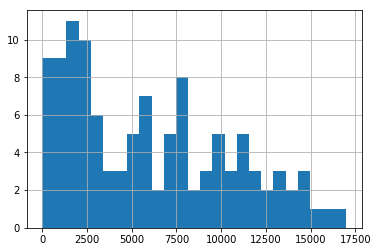

In [20]:
recent_grads['Full_time'].hist(bins=25, range=(0,17000))

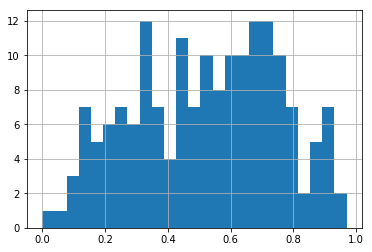

In [21]:
recent_grads['ShareWomen'].hist(bins=25)

Mostly, there are more women than man, in majors.

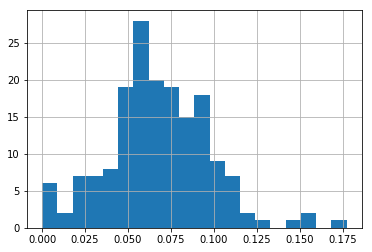

In [22]:
recent_grads['Unemployment_rate'].hist(bins=20)

<font size="4">The highest number of majors correspond to unemployment rates between 0.04 - 0.10</font>

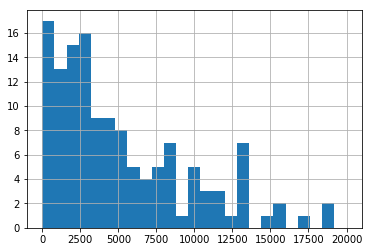

In [23]:
recent_grads['Men'].hist(bins=25, range=(0,20000))

<font size="4">On most of the majors the number of male students were smaller than 10000.</font>

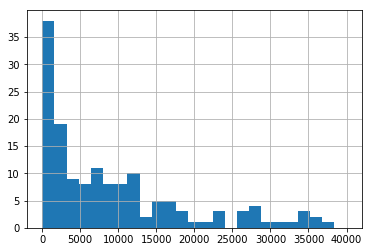

In [24]:
recent_grads['Women'].hist(bins=25, range=(0,40000))

<font size="4">On most of the majors the number of female students was smaller hta 20000.</font>

<font size="4">In conclusion, more than 50% of majors are predominantly female. The most popular median salary range is 30000-50000 dollars.</font>

In [25]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fa30b38>,
      dtype=object)

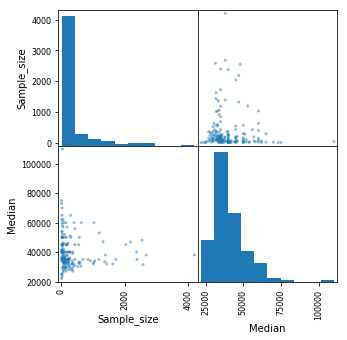

In [26]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(5,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fbcd2b0>,
      dtype=object)

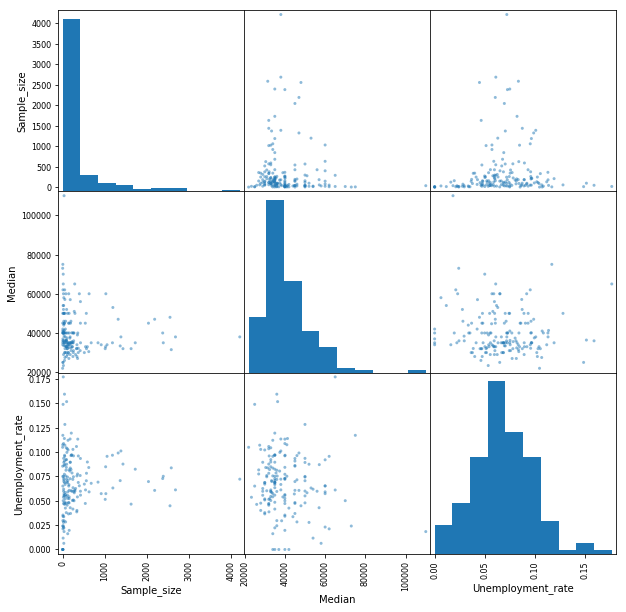

In [27]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

<font size="4">Scatter matrixes above are just to show previously explained data in more analizable way.</font>

In [20]:
scatter_matrix(recent_grads[['ShareWomen', 'Median', 'Unemployment_rate']], figsize=(10,10))

NameError: name 'scatter_matrix' is not defined

<font size="4">To better visualize Sample_size and Median/Unemployment_rate/ShareWomen scatters I am going to use hexagonal bin plots:</font>

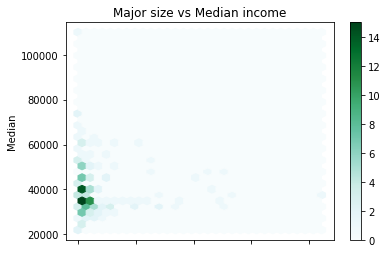

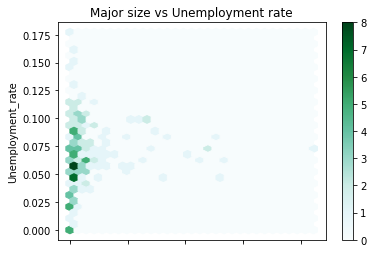

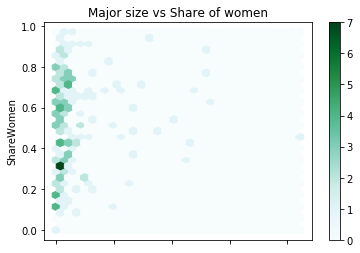

In [86]:
recent_grads.plot.hexbin(x='Sample_size', y='Median', gridsize=30, title='Major size vs Median income')
recent_grads.plot.hexbin(x='Sample_size', y='Unemployment_rate', gridsize=30, title='Major size vs Unemployment rate')
recent_grads.plot.hexbin(x='Sample_size', y='ShareWomen', gridsize=30, title='Major size vs Share of women')

<font size="4">We can see that there is a negative correlation between share of women in a major and median salary. That seems to be the only link in this matrix.</font>

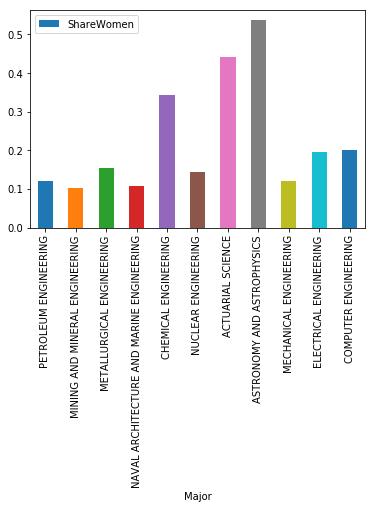

In [29]:
#recent_grads[0:11]['ShareWomen'].plot(kind='bar')
recent_grads[0:11].plot.bar(x='Major', y='ShareWomen')



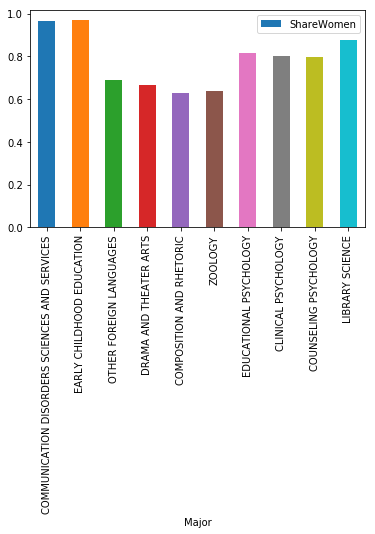

In [30]:
#recent_grads[-10:]['ShareWomen'].plot(kind='bar')
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen')

<font size='4'>We can see above, that there are significantly less women than man on the most well-paying majors. Also, the worst-paying majors consists mostly of women.</font>

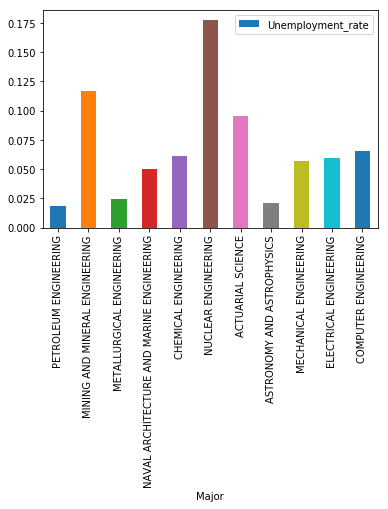

In [31]:
recent_grads[0:11].plot.bar(x='Major', y='Unemployment_rate')

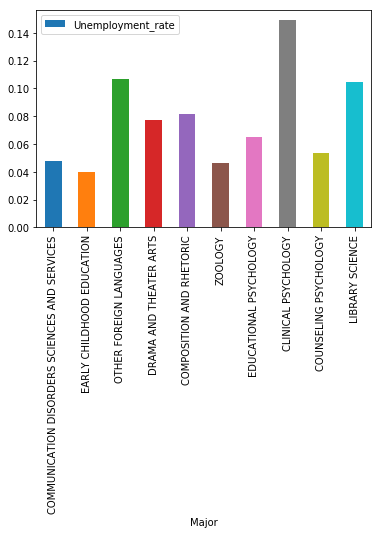

In [32]:
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate')

<font size='4'>Maybe suprisingly, the unemployment rates do not vary much between top 10 and bottom 10 majors</font>

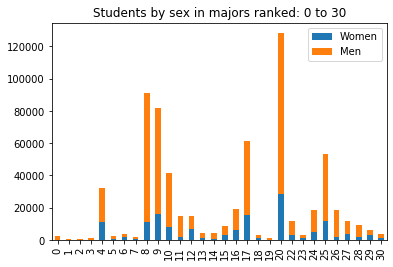

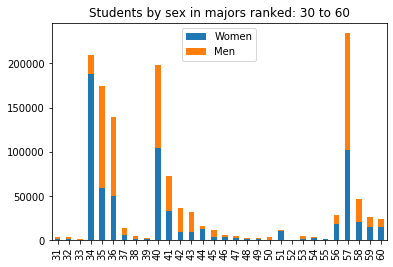

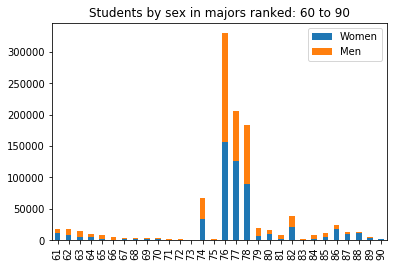

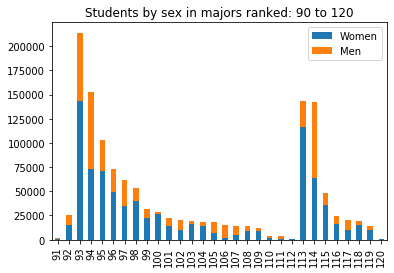

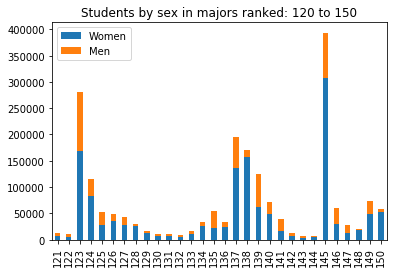

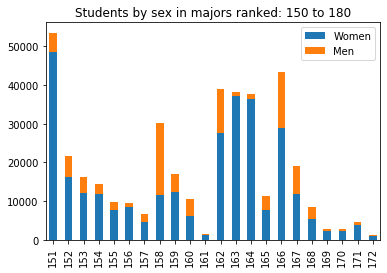

In [21]:
for ten in range(0, 173, 30):
    recent_grads[['Women', 'Men']][ten:ten+30].plot(kind='bar', stacked=True, title='Students by sex in majors ranked: ' + str(ten) + ' to ' + str(ten+30))

<font size='4'>As we can see above, stacked bar plots confirm our previous conlcusions that less women major in higher-paying fields.</font>

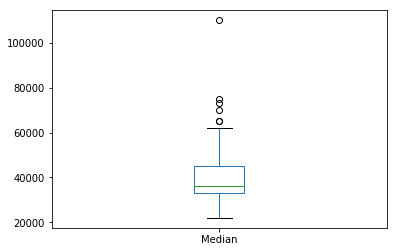

In [63]:
recent_grads['Median'].plot(kind='box')

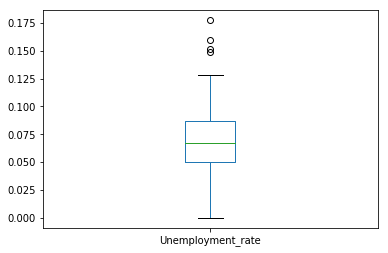

In [64]:
recent_grads['Unemployment_rate'].plot(kind='box')

<font size='4'>The median unemployment rate is around 0.075, and inner 50% of the population is within 0.05 - 0.085 limits.</font>

In [34]:
#calculating the total amount of unemployed people
unemployed_sum = (recent_grads['Total']*recent_grads['Unemployment_rate']).sum()
print('There are {} recent graduates, out of which {} are unemployed'.format(round(recent_grads['Total'].sum()),
                                                                             round(unemployed_sum)))

There are 6771654 recent graduates, out of which 488033 are unemployed


In [39]:
#calculating the total unemployment rate
unemployment_rate = unemployed_sum / recent_grads['Total'].sum()
print('Thus the unemployment rate is at {}%'.format(round(unemployment_rate*100)))

Thus the unemployment rate is at 7%
